In [1]:
!git clone https://github.com/quant4junior/algoTrade.git

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Cloning into 'algoTrade'...
remote: Enumerating objects: 3986, done.
remote: Counting objects: 100% (3986/3986), done.
remote: Compressing objects: 100% (3916/3916), done.
remote: Total 3986 (delta 134), reused 3898 (delta 64), pack-reused 0
Receiving objects: 100% (3986/3986), 24.53 MiB | 23.47 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [2]:
"""
퀀트 투자 = 데이터 기반 전략
퀀트는 정량적 방법론을 기반으로 투자 의사를 결정하는 것이며, 여기서 정량적 방법론이란 모든 것을 수치화하는 것을 의미한다.
기술 지표를 만들고 이를 투자에 활용하는 '기술 지표 투자 전략'과 기업 제무제표를 사용하는 '가치 투자 전략', 이렇게 크게 두가지로 나눌 수 있다.
모멘텀 지표 vs 평균 회귀 지표
"""

"\n퀀트 투자 = 데이터 기반 전략\n퀀트는 정량적 방법론을 기반으로 투자 의사를 결정하는 것이며, 여기서 정량적 방법론이란 모든 것을 수치화하는 것을 의미한다.\n기술 지표를 만들고 이를 투자에 활용하는 '기술 지표 투자 전략'과 기업 제무제표를 사용하는 '가치 투자 전략', 이렇게 크게 두가지로 나눌 수 있다.\n모멘텀 지표 vs 평균 회귀 지표\n"

# **4.2 평균 회귀 전략**

**4.2.1 볼린저 밴드**

In [3]:
#횡보중 좁은 구간의 볼린저 밴드에서 중심선 상향 전환 -> 매수 시점 고려
#적극 매수 시점(밴드의 상향 이탈)
#최적의 매도 시점은 밴드가 상향 이탈 후 다시 들어올 때

In [4]:
import pandas as pd
df = pd.read_csv("./algoTrade/data/us_etf_data/SPY.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.706757,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.896694,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.953669,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,27.238594,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.352570,531500


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6648.000000,6648.000000,6648.000000,6648.000000,6648.000000,6.648000e+03
mean,133.762935,134.541071,132.893598,133.759854,110.399391,8.440122e+07
std,59.488006,59.671285,59.277882,59.492056,64.113369,9.837713e+07
min,43.343750,43.531250,42.812500,43.406250,26.383823,5.200000e+03
25%,96.780937,97.735000,95.726562,96.921875,71.256485,6.966775e+06
50%,124.433750,125.335938,123.500000,124.312500,93.641503,5.709990e+07
75%,151.702503,152.514999,150.810624,151.791714,125.251474,1.229908e+08
max,296.040009,296.309998,293.760010,295.859985,294.427979,8.710263e+08


In [6]:
price_df = df.loc[:, ['Date', 'Adj Close']].copy()
price_df.head()

,Date,Adj Close
0,1993-01-29,26.706757
1,1993-02-01,26.896694
2,1993-02-02,26.953669
3,1993-02-03,27.238594
4,1993-02-04,27.352570


In [7]:
price_df.set_index(['Date'],inplace=True)
price_df.head()

,Adj Close
Date,
1993-01-29,26.706757
1993-02-01,26.896694
1993-02-02,26.953669
1993-02-03,27.238594
1993-02-04,27.352570


In [8]:
price_df['center'] = price_df['Adj Close'].rolling(window = 20).mean()
price_df.iloc[18:25]

,Adj Close,center
Date,,
1993-02-25,26.953669,NaN
1993-02-26,26.991682,26.910942
1993-03-01,26.915695,26.921389
1993-03-02,27.314577,26.942283
1993-03-03,27.428545,26.966027
1993-03-04,27.276592,26.967927
1993-03-05,27.200619,26.960329


In [9]:
price_df['ub'] = price_df['center'] + 2 * price_df['Adj Close'].rolling(window=20).std()
price_df.iloc[18:25]

,Adj Close,center,ub
Date,,,
1993-02-25,26.953669,NaN,NaN
1993-02-26,26.991682,26.910942,27.598068
1993-03-01,26.915695,26.921389,27.601764
1993-03-02,27.314577,26.942283,27.644772
1993-03-03,27.428545,26.966027,27.701465
1993-03-04,27.276592,26.967927,27.706519
1993-03-05,27.200619,26.960329,27.685261


In [10]:
price_df['lb'] = price_df['center'] - 2 * price_df['Adj Close'].rolling(window=20).std()
price_df.iloc[18:25]

,Adj Close,center,ub,lb
Date,,,,
1993-02-25,26.953669,NaN,NaN,NaN
1993-02-26,26.991682,26.910942,27.598068,26.223816
1993-03-01,26.915695,26.921389,27.601764,26.241013
1993-03-02,27.314577,26.942283,27.644772,26.239794
1993-03-03,27.428545,26.966027,27.701465,26.230589
1993-03-04,27.276592,26.967927,27.706519,26.229334
1993-03-05,27.200619,26.960329,27.685261,26.235397


In [11]:
n = 20
sigma = 2
def bollinger_band(price_df, n, sigma):
  bb = price_df.copy()
  bb['center'] = bb['Adj Close'].rolling(n).mean()
  bb['ub'] = bb['center'] + sigma * bb['Adj Close'].rolling(n).std()
  bb['lb'] = bb['center'] - sigma * bb['Adj Close'].rolling(n).std()
  return bb

bollinger = bollinger_band(price_df, n, sigma)

In [12]:
base_date = '2009-01-02'
sample = bollinger.loc[base_date:]
sample.head()

,Adj Close,center,ub,lb
Date,,,,
2009-01-02,75.099487,71.378963,74.538229,68.219698
2009-01-05,75.010582,71.711677,74.931608,68.491746
2009-01-06,75.511505,71.964058,75.543401,68.384716
2009-01-07,73.249435,71.980327,75.580937,68.379718
2009-01-08,73.548378,72.071645,75.736733,68.406557


In [13]:
sample = price_df.loc[base_date:]

In [14]:
book = sample[['Adj Close']].copy()
book['trade'] = ''
book.head()

,Adj Close,trade
Date,,
2009-01-02,75.099487,
2009-01-05,75.010582,
2009-01-06,75.511505,
2009-01-07,73.249435,
2009-01-08,73.548378,


In [15]:
def create_trade_book(sample):
  book = sample[['Adj Close']].copy()
  book['trade'] = ''
  return (book)

In [16]:
#거래 전략
def tradings(sample, book):
  for i in sample.index:
    if sample.loc[i, 'Adj Close'] > sample.loc[i, 'ub']: #상단 밴드 이탈 시 동작 안 함
      book.loc[i, 'trade'] = ''
    elif sample.loc[i, 'lb'] > sample.loc[i, 'Adj Close']: #하반 밴드 이탈 시 매수
      if book.shift(1).loc[i, 'trade'] == 'buy': # 이미 매수 상태라면
        book.loc[i, 'trade'] = 'buy' # 매수 상태 유지
      else:
        book.loc[i, 'trade'] = 'buy'
    elif sample.loc[i, 'ub'] >= sample.loc[i, 'Adj Close'] and sample.loc[i, 'lb'] <= sample.loc[i, 'Adj Close']: # 볼린저 밴드 안에 있을 시
      if book.shift(1).loc[i, 'trade'] == 'buy':
        book.loc[i, 'trade'] = 'buy'
      else:
        book.loc[i, 'trade'] = ''
  return (book)


    

In [17]:
book = tradings(sample, book)
book.tail(10)

,Adj Close,trade
Date,,
2019-06-11,287.501678,buy
2019-06-12,286.994171,buy
2019-06-13,288.178375,buy
2019-06-14,287.859955,buy
2019-06-17,287.969391,buy
2019-06-18,290.984741,buy
2019-06-19,291.641541,buy
2019-06-20,294.427979,buy
2019-06-21,294.000000,buy


In [18]:
def returns(book):
  rtn = 1.0
  book['return'] = 1
  buy = 0.0
  sell = 0.0
  for i in book.index:

    # long 진입
    if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':
      buy = book.loc[i, 'Adj Close']
      print('진입일 : ', i, 'long 진입가격 : ', buy)
    # long 청산
    elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':
      sell = book.loc[i, 'Adj Close']
      rtn = ((sell - buy) / buy) + 1
      book.loc[i, 'return'] = rtn
      print('청산일 : ', i, 'long 진입가격 : ', buy, ' | long 청산가격 : ', sell, ' | return:', round(rtn, 4))  
      
    if book.loc[i, 'trade'] == '':
        buy = 0.0
        sell = 0.0
    
    acc_rtn = 1.0
    for i in book.index:
      rtn = book.loc[i, 'return']
      acc_rtn = acc_rtn * rtn # 누적 수익률
      book.loc[i, 'acc return'] = acc_rtn

  print('Accumulated return : ', round(acc_rtn, 4))
  return (round(acc_rtn, 4)) 

print(returns(book))

진입일 :  2009-01-20 long 진입가격 :  65.089966
청산일 :  2009-03-23 long 진입가격 :  65.089966  | long 청산가격 :  66.898392  | return: 1.0278
진입일 :  2010-01-22 long 진입가격 :  90.269791
청산일 :  2010-04-14 long 진입가격 :  90.269791  | long 청산가격 :  100.584618  | return: 1.1143
진입일 :  2010-05-04 long 진입가격 :  97.538597
청산일 :  2010-10-13 long 진입가격 :  97.538597  | long 청산가격 :  98.862717  | return: 1.0136
진입일 :  2011-03-10 long 진입가격 :  109.513054
청산일 :  2011-04-26 long 진입가격 :  109.513054  | long 청산가격 :  114.094101  | return: 1.0418
진입일 :  2011-05-23 long 진입가격 :  111.783257
청산일 :  2011-06-30 long 진입가격 :  111.783257  | long 청산가격 :  112.26088  | return: 1.0043
진입일 :  2011-08-02 long 진입가격 :  106.748672
청산일 :  2012-02-03 long 진입가격 :  106.748672  | long 청산가격 :  115.768776  | return: 1.0845
진입일 :  2012-04-10 long 진입가격 :  117.451515
청산일 :  2012-07-03 long 진입가격 :  117.451515  | long 청산가격 :  119.371857  | return: 1.0164
진입일 :  2012-10-23 long 진입가격 :  123.511292
청산일 :  2012-12-18 long 진입가격 :  123.511292  | long 청산가격 :  126.96

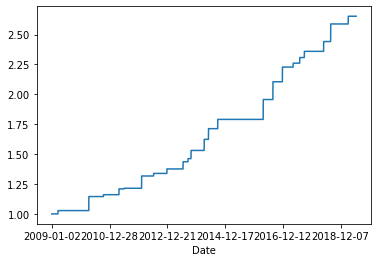

In [19]:
import matplotlib.pylab as plt
book['acc return'].plot()

**4.3 듀얼 모멘텀 전략**

In [20]:
#N개월간 수익률이 양수이면 매수하고 음수이면 매도하는 long only 포지션으로 절대 모멘텀 전략을 만들어보자.

import pandas as pd
import numpy as np
import datetime
read_df = pd.read_csv("./algoTrade/data/us_etf_data/SPY.csv")
read_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.706757,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.896694,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.953669,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,27.238594,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.352570,531500


In [21]:
price_df = read_df.loc[:, ['Date', 'Adj Close']].copy()
price_df.head()

,Date,Adj Close
0,1993-01-29,26.706757
1,1993-02-01,26.896694
2,1993-02-02,26.953669
3,1993-02-03,27.238594
4,1993-02-04,27.352570


In [22]:
price_df['STD_YM'] = price_df['Date'].map(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
price_df.head()

,Date,Adj Close,STD_YM
0,1993-01-29,26.706757,1993-01
1,1993-02-01,26.896694,1993-02
2,1993-02-02,26.953669,1993-02
3,1993-02-03,27.238594,1993-02
4,1993-02-04,27.352570,1993-02


In [23]:
month_list = price_df['STD_YM'].unique()
month_last_df = pd.DataFrame()
for m in month_list:
  month_last_df = month_last_df.append(price_df.loc[price_df[price_df['STD_YM'] == m].index[-1], : ])

month_last_df.set_index(['Date'], inplace=True)
month_last_df.head()

,Adj Close,STD_YM
Date,,
1993-01-29,26.706757,1993-01
1993-02-26,26.991682,1993-02
1993-03-31,27.596252,1993-03
1993-04-30,26.890142,1993-04
1993-05-28,27.615356,1993-05


In [24]:
month_last_df['BF_1M_Adj Close'] = month_last_df.shift(1)['Adj Close']
month_last_df['BF_12M_Adj Close'] = month_last_df.shift(12)['Adj Close']
month_last_df.fillna(0, inplace=True)
month_last_df.head(15)

,Adj Close,STD_YM,BF_1M_Adj Close,BF_12M_Adj Close
Date,,,,
1993-01-29,26.706757,1993-01,0.000000,0.000000
1993-02-26,26.991682,1993-02,26.706757,0.000000
1993-03-31,27.596252,1993-03,26.991682,0.000000
1993-04-30,26.890142,1993-04,27.596252,0.000000
1993-05-28,27.615356,1993-05,26.890142,0.000000
1993-06-30,27.714964,1993-06,27.615356,0.000000
1993-07-30,27.580431,1993-07,27.714964,0.000000
1993-08-31,28.637531,1993-08,27.580431,0.000000
1993-09-30,28.429131,1993-09,28.637531,0.000000


In [25]:
print(month_last_df.loc['1993-03-31', 'BF_1M_Adj Close'])
print(month_last_df.shift(1).loc['1993-03-31', 'BF_1M_Adj Close'])

26.991682
26.706757


In [26]:
book = price_df.copy()
book.set_index(['Date'], inplace=True)
book['trade'] = ''
book.head()

,Adj Close,STD_YM,trade
Date,,,
1993-01-29,26.706757,1993-01,
1993-02-01,26.896694,1993-02,
1993-02-02,26.953669,1993-02,
1993-02-03,27.238594,1993-02,
1993-02-04,27.352570,1993-02,


In [27]:
#절대 모멘텀 전략의 핵심은 거래 실행

ticker = 'SPY'
for x in month_last_df.index:
  signal = ''

  momentum_index = month_last_df.loc[x, 'BF_1M_Adj Close'] / month_last_df.loc[x, 'BF_12M_Adj Close'] - 1

  flag = True if ((momentum_index > 0.0) and (momentum_index != np.inf) and (momentum_index != -np.inf)) else False and True
  if flag :
    signal = 'buy ' + ticker
  print('날짜 : ', x, ' 모멘텀 인덱스 : ', momentum_index, 'flag : ', flag , 'signal : ', signal)
  book.loc[x:, 'trade'] = signal 

날짜 :  1993-01-29  모멘텀 인덱스 :  nan flag :  False signal :  
날짜 :  1993-02-26  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-03-31  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-04-30  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-05-28  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-06-30  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-07-30  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-08-31  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-09-30  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-10-29  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-11-30  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-12-31  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1994-01-31  모멘텀 인덱스 :  0.08709114326385659 flag :  True signal :  buy SPY
날짜 :  1994-02-28  모멘텀 인덱스 :  0.1131289632117034 flag :  True signal :  buy SPY
날짜 :  1994-03-31  모멘텀 인덱스 :  0.05699081889816049 flag :  True signal :  buy SPY
날짜 :  1994-04-29  모멘텀 인덱스 :  0.039294028272517156 flag :  True si

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


True signal :  buy SPY
날짜 :  1998-06-30  모멘텀 인덱스 :  0.2476413534461983 flag :  True signal :  buy SPY
날짜 :  1998-07-31  모멘텀 인덱스 :  0.2052270482267502 flag :  True signal :  buy SPY
날짜 :  1998-08-31  모멘텀 인덱스 :  0.25389559989508625 flag :  True signal :  buy SPY
날짜 :  1998-09-30  모멘텀 인덱스 :  0.02745945182765741 flag :  True signal :  buy SPY
날짜 :  1998-10-30  모멘텀 인덱스 :  0.12029813448586624 flag :  True signal :  buy SPY
날짜 :  1998-11-30  모멘텀 인덱스 :  0.1660121511966206 flag :  True signal :  buy SPY
날짜 :  1998-12-31  모멘텀 인덱스 :  0.2079018659454548 flag :  True signal :  buy SPY
날짜 :  1999-01-29  모멘텀 인덱스 :  0.27056222182679024 flag :  True signal :  buy SPY
날짜 :  1999-02-26  모멘텀 인덱스 :  0.23008030777830268 flag :  True signal :  buy SPY
날짜 :  1999-03-31  모멘텀 인덱스 :  0.13525200948100213 flag :  True signal :  buy SPY
날짜 :  1999-04-30  모멘텀 인덱스 :  0.16739577288826735 flag :  True signal :  buy SPY
날짜 :  1999-05-28  모멘텀 인덱스 :  0.2374272505944519 flag :  True signal :  buy SPY
날짜 :  1999-06-30  모멘텀 

In [28]:
print(book)

             Adj Close   STD_YM    trade
Date                                    
1993-01-29   26.706757  1993-01         
1993-02-01   26.896694  1993-02         
1993-02-02   26.953669  1993-02         
1993-02-03   27.238594  1993-02         
1993-02-04   27.352570  1993-02         
...                ...      ...      ...
2019-06-18  290.984741  2019-06  buy SPY
2019-06-19  291.641541  2019-06  buy SPY
2019-06-20  294.427979  2019-06  buy SPY
2019-06-21  294.000000  2019-06  buy SPY
2019-06-24  293.640015  2019-06  buy SPY

[6648 rows x 3 columns]


In [29]:
def returns(book, ticker):
  rtn = 1.0
  book['return'] = 1
  buy = 0.0
  sell = 0.0
  for i in book.index:
    if book.loc[i, 'trade'] == 'buy ' + ticker and book.shift(1).loc[i, 'trade'] == '':
    #long 진입
      buy = book.loc[i, 'Adj Close']
      print('진입일 : ', i, 'long 진입가격 : ', buy)
    elif book.loc[i, 'trade'] == 'buy ' + ticker and book.shift(1).loc[i, 'trade'] == 'buy ' + ticker:
    #보유중
      current = book.loc[i, 'Adj Close']
      rtn = (current - buy) / buy + 1
      book.loc[i, 'return'] = rtn

    elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy ' + ticker:
    #long 청산
      sell = book.loc[i, 'Adj Close']
      rtn = (sell - buy) / buy + 1
      book.loc[i, 'return'] = rtn
      print('청산일 : ', i, 'long 진입가격 : ', buy, ' | long 청산가격 : ', \
            sell, ' | return: ', round(rtn, 4))
    
    if book.loc[i, 'trade'] == '':
      buy = 0.0
      sell = 0.0
      current = 0.0

  acc_rtn = 1.0
  for i in book.index:
    if book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy ' + ticker:
    #long 청산 시
      rtn = book.loc[i, 'return']
      acc_rtn = acc_rtn * rtn
      book.loc[i:, 'acc return'] = acc_rtn

  print('Accumulated return : ', round(acc_rtn, 4))
  return (round(acc_rtn, 4))

In [30]:
returns(book, ticker)

진입일 :  1994-01-31 long 진입가격 :  30.045223
청산일 :  1994-12-30 long 진입가격 :  30.045223  | long 청산가격 :  29.148033  | return:  0.9701
진입일 :  1995-02-28 long 진입가격 :  31.357141
청산일 :  2000-12-29 long 진입가격 :  31.357141  | long 청산가격 :  92.002388  | return:  2.934
진입일 :  2001-02-28 long 진입가격 :  86.926689
청산일 :  2001-03-30 long 진입가격 :  86.926689  | long 청산가격 :  82.055542  | return:  0.944
진입일 :  2003-07-31 long 진입가격 :  72.262482
청산일 :  2008-02-29 long 진입가격 :  72.262482  | long 청산가격 :  105.568001  | return:  1.4609
진입일 :  2009-10-30 long 진입가격 :  85.141289
청산일 :  2011-10-31 long 진입가격 :  85.141289  | long 청산가격 :  107.309486  | return:  1.2604
진입일 :  2011-11-30 long 진입가격 :  106.873421
청산일 :  2012-01-31 long 진입가격 :  106.873421  | long 청산가격 :  112.998047  | return:  1.0573
진입일 :  2012-02-29 long 진입가격 :  117.902817
청산일 :  2015-10-30 long 진입가격 :  117.902817  | long 청산가격 :  193.002396  | return:  1.637
진입일 :  2015-11-30 long 진입가격 :  193.707825
청산일 :  2016-02-29 long 진입가격 :  193.707825  | long 청산가격 :  180.73

10.9953

In [31]:
def data_preprocessing(sample, ticker, base_date):
  sample['CODE'] = ticker
  sample = sample[sample['Date'] >= base_date][['Date', 'CODE', 'Adj Close']].copy()
  #기준일자 이후 데이터 사용

  sample.reset_index(inplace = True, drop = True)
  sample['STD_YM'] = sample['Date'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
  sample['1M_RET'] = 0.0
  ym_keys = list(sample['STD_YM'].unique())
  return sample, ym_keys

def create_trade_book(sample, sample_codes):
  book = pd.DataFrame()
  book = sample[sample_codes].copy()
  book['STD_YM'] = book.index.map(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))

  for c in sample_codes:
    book['p ' + c] = ''
    book['r ' + c] = ''
  return book

def tradings(book, s_codes):
  std_ym = ''
  buy_phase = False
  for s in s_codes:
    print(s)
    for i in book.index:
      if book.loc[i, 'p ' + s] == '' and book.shift(1).loc[i, 'p ' + s] == 'ready ' + s:
        std_ym = book.loc[i, 'STD_YM']
        buy_phase = True

      if book.loc[i, 'p ' + s] == '' and book.loc[i, 'STD_YM'] == std_ym and buy_phase == True:
        book.loc[i, 'p ' + s] = 'buy ' + s

      if book.loc[i, 'p ' + s] == '':
        std_ym = None
        buy_phase = False
  return book

def multi_returns(book, s_codes):
  rtn = 1.0
  buy_dict = {}
  num = len(s_codes)
  sell_dict = {}

  for i in book.index:
    for s in s_codes:
      if book.loc[i, 'p ' + s] == 'buy ' + s and book.shift(1).loc[i, 'p ' + s] == 'ready ' + s and book.shift(2).loc[i, 'p ' + s] == '':
        buy_dict[s] = book.loc[i, s]
      elif book.loc[i, 'p ' + s] == '' and book.shift(1).loc[i, 'p ' + s] == 'buy ' + s:
        #long 청산
        sell_dict[s] = book.loc[i, s]
        rtn = (sell_dict[s] / buy_dict[s]) - 1
        book.loc[i, 'r ' + s] = rtn
        print('개별 청산일 : ', i, '종목 코드 : ', s, 'long 진입가격 : ', buy_dict[s], ' | long 청산가격 : ', sell_dict[s], ' | return:', round(rtn * 100, 2), '%')

      if book.loc[i, 'p ' + s] == '': #제로 포지션 || 포지션 청산
        buy_dict[s] = 0.0
        sell_dict[s] = 0.0

  acc_rtn = 1.0
  for i in book.index:
    rtn = 0.0
    count = 0
    for s in s_codes:
      if book.loc[i, 'p ' + s] == '' and book.shift(1).loc[i, 'p ' + s] == 'buy ' + s:
        #청산. 이때 수익률이 나오니깐
        count += 1
        rtn += book.loc[i, 'r ' + s]
    if (rtn != 0.0) & (count != 0):
      acc_rtn *= (rtn / count) + 1
      print('누적 청산일 : ', i, '청산 종목수 : ', count, '청산 수익률 : ', round((rtn / count), 4), '누적 수익률 : ', round(acc_rtn, 4))

    book.loc[i, 'acc_rtn'] = acc_rtn

  print('누적 수익률 : ', round(acc_rtn, 4))

In [32]:
#듀얼 모멘텀 전략 구현을 위한 상대 모멘텀 전략

import os
import glob
import pandas as pd
import numpy as np
import datetime

files = glob.glob('./algoTrade/data/us_etf_data/*.csv')

#Monthly 데이터 저장
month_last_df = pd.DataFrame(columns=['Date', 'CODE', '1M_RET'])

#종목 데이터프레임 생성
stock_df = pd.DataFrame(columns = ['Date', 'CODE', 'Adj Close'])

for file in files:
  """
  데이터 저장 경로에 있는 개별 종목들을 읽어온다.
  """

  if os.path.isdir(file):
    print('%s <DIR> '%file)
  else:
    folder, name = os.path.split(file)
    head, tail = os.path.splitext(name)
    print(file)
    read_df = pd.read_csv(file) #경로를 읽은 데이터를 하나씩 읽기
    #1단계. 데이터 가공
    price_df, ym_keys = data_preprocessing(read_df, head, base_date = '2010-01-02')
    #가공한 데이터 붙이기
    stock_df = stock_df.append(price_df.loc[:, ['Date', 'CODE', 'Adj Close']], sort=False)
    #월별 상대 모멘텀 계산을 위한 1개월간 수익률 계산
    for ym in ym_keys:
      m_ret = price_df.loc[price_df[price_df['STD_YM'] == ym].index[-1], 'Adj Close'] / price_df.loc[price_df[price_df['STD_YM'] == ym].index[0], 'Adj Close']
      price_df.loc[price_df['STD_YM'] == ym, ['1M_RET']] = m_ret
      month_last_df = month_last_df.append(price_df.loc[price_df[price_df['STD_YM'] == ym].index[-1], ['Date', 'CODE', '1M_RET']])

#2단계. 상대 모멘텀 수익률로 필터링
month_ret_df = month_last_df.pivot('Date', 'CODE', '1M_RET').copy()
#투자종목 선택할 rank
month_ret_df = month_ret_df.rank(axis=1, ascending=False, method = 'max', pct=True)
#상위 40%에 드는 종목들만 신호 목록
month_ret_df = month_ret_df.where(month_ret_df < 0.4, np.nan)
month_ret_df.fillna(0, inplace=True)
month_ret_df[month_ret_df != 0] = 1
stock_codes = list(stock_df['CODE'].unique())

#3단계. 신호 목록으로 트레이딩 + 포지셔닝
sig_dict = dict()
for date in month_ret_df.index:
  ticker_list = list(month_ret_df.loc[date, month_ret_df.loc[date, :] >= 1.0].index)
  sig_dict[date] = ticker_list
stock_c_matrix = stock_df.pivot('Date', 'CODE', 'Adj Close').copy()
book = create_trade_book(stock_c_matrix, list(stock_df['CODE'].unique()))

for date, values in sig_dict.items():
  for stock in values:
    book.loc[date, 'p ' + stock] = 'ready ' + stock

book = tradings(book, stock_codes)
multi_returns(book, stock_codes)

'\n  데이터 저장 경로에 있는 개별 종목들을 읽어온다.\n  '

./algoTrade/data/us_etf_data/SPY.csv


'\n  데이터 저장 경로에 있는 개별 종목들을 읽어온다.\n  '

./algoTrade/data/us_etf_data/USM.csv


'\n  데이터 저장 경로에 있는 개별 종목들을 읽어온다.\n  '

./algoTrade/data/us_etf_data/WMT.csv


'\n  데이터 저장 경로에 있는 개별 종목들을 읽어온다.\n  '

./algoTrade/data/us_etf_data/AMZN.csv


'\n  데이터 저장 경로에 있는 개별 종목들을 읽어온다.\n  '

./algoTrade/data/us_etf_data/USO.csv


'\n  데이터 저장 경로에 있는 개별 종목들을 읽어온다.\n  '

./algoTrade/data/us_etf_data/BND.csv


'\n  데이터 저장 경로에 있는 개별 종목들을 읽어온다.\n  '

./algoTrade/data/us_etf_data/MSFT.csv


'\n  데이터 저장 경로에 있는 개별 종목들을 읽어온다.\n  '

./algoTrade/data/us_etf_data/GM.csv


'\n  데이터 저장 경로에 있는 개별 종목들을 읽어온다.\n  '

./algoTrade/data/us_etf_data/SLV.csv


'\n  데이터 저장 경로에 있는 개별 종목들을 읽어온다.\n  '

./algoTrade/data/us_etf_data/GDX.csv


'\n  데이터 저장 경로에 있는 개별 종목들을 읽어온다.\n  '

./algoTrade/data/us_etf_data/AAPL.csv


'\n  데이터 저장 경로에 있는 개별 종목들을 읽어온다.\n  '

./algoTrade/data/us_etf_data/GLD.csv
SPY
USM
WMT
AMZN
USO
BND
MSFT
GM
SLV
GDX
AAPL
GLD
개별 청산일 :  2010-03-01 종목 코드 :  WMT long 진입가격 :  42.12096  | long 청산가격 :  42.451756  | return: 0.79 %
개별 청산일 :  2010-03-01 종목 코드 :  BND long 진입가격 :  61.280487  | long 청산가격 :  61.585163  | return: 0.5 %
개별 청산일 :  2010-03-01 종목 코드 :  GLD long 진입가격 :  108.349998  | long 청산가격 :  109.43  | return: 1.0 %
개별 청산일 :  2010-04-01 종목 코드 :  SPY long 진입가격 :  90.145805  | long 청산가격 :  97.770996  | return: 8.46 %
개별 청산일 :  2010-04-01 종목 코드 :  USO long 진입가격 :  38.349998  | long 청산가격 :  41.240002  | return: 7.54 %
개별 청산일 :  2010-04-01 종목 코드 :  GDX long 진입가격 :  42.019035  | long 청산가격 :  43.675705  | return: 3.94 %
개별 청산일 :  2010-05-03 종목 코드 :  USM long 진입가격 :  36.212452  | long 청산가격 :  36.744232  | return: 1.47 %
개별 청산일 :  2010-05-03 종목 코드 :  AMZN long 진입가격 :  131.809998  | long 청산가격 :  137.490005  | return: 4.31 %
개별 청산일 :  2010-05-03 종목 코드 :  SLV long 진입가격 :  17.540001  | long 청산가격 :  18.42  | return: 5.02 %
개별 청산일 :  

**4.4 가치 투자 전략**

In [33]:
#자본 수익률은 투입된 자본 대비 수익을 얼마나 올릴 수 있는지를 판단하고, 이익 수익률은 주가 대비 수익을 얼마나 올릴 수 있는지를 판단하는 지표이다.
#일반 사용자는 각 수치를 계산하기 어려우므로, 대개 자본 수익률 대신 총자산 순이익률(ROA)과 이익 수익률 대신 주가 수익률(PER)을 이용해 마법공식을 구성한다.
#ROA가 높은 순으로 정렬해 우량한 주식을 결정하고 PER이 낮은 순으로 정렬해 저렴한 주식을 결정한다.

In [34]:
!pip install finance-datareader

     |████████████████████████████████| 48 kB 5.3 MB/s 


In [35]:
import FinanceDataReader as fdr
krx_df = fdr.StockListing('KRX')
krx_df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [36]:
import pandas as pd
import numpy as np
df = pd.read_csv("./algoTrade/data/ch04/PER_ROA.csv", encoding = 'cp949', engine='python')
df.head()
#마법공식을 구현할 대는 보통주만을 대상으로 하므로 NaN을 보이는 데이터는 일단 제외한다.

,종목명,현재가,전일비,등락률,액면가,거래량,시가총액,영업이익,PER,ROA
0,삼성전자,43950,100,-0.23%,100,4637815,2623719,588867.0,7.30,13.83
1,SK하이닉스,74400,600,0.81%,5000,1673056,541634,208438.0,3.49,28.49
2,삼성전자우,36350,350,-0.95%,100,553133,299119,NaN,6.03,NaN
3,현대차,126000,2000,1.61%,5000,252713,269222,24222.0,23.54,0.92
4,NAVER,148500,500,0.34%,100,367244,244748,9425.0,37.72,7.02


In [37]:
df = df[~df.isin([np.nan, -np.inf, np.inf]).any(1)]
df.head()

,종목명,현재가,전일비,등락률,액면가,거래량,시가총액,영업이익,PER,ROA
0,삼성전자,43950,100,-0.23%,100,4637815,2623719,588867.0,7.30,13.83
1,SK하이닉스,74400,600,0.81%,5000,1673056,541634,208438.0,3.49,28.49
3,현대차,126000,2000,1.61%,5000,252713,269222,24222.0,23.54,0.92
4,NAVER,148500,500,0.34%,100,367244,244748,9425.0,37.72,7.02
5,LG화학,329500,9500,2.97%,5000,176590,232602,22461.0,17.52,5.63


In [38]:
def sort_value(s_value, asc = True, standard = 0):
  '''
  description
    특정 지표값을 정렬한다.

  parameters
    s_value : pandas Series
      정렬할 데이터를 받는다.
  
    asc : bool
      True : 오름차순
      False : 내림차순

    standard : int
      조건에 맞는 값을 True로 대체하기 위한 기준값
  
  returns
    s_value_mask_rank : pandas Series
      정렬된 순위
  '''
  #지표별 기준값 미만은 필터링한다
  s_value_mask = s_value.mask(s_value < standard, np.nan)

  #필터링된 종목에서 순위를 선정한다
  s_value_mask_rank = s_value_mask.rank(ascending=asc, na_option='bottom')

  return s_value_mask_rank

In [39]:
per = pd.to_numeric(df['PER'])
roa = pd.to_numeric(df['ROA'])

#PER 지표값을 기준으로 순위 정렬 및 0 미만 값 제거
per_rank = sort_value(per, asc=True, standard = 0)

roa_rank = sort_value(roa, asc=False, standard = 0)

In [40]:
result_rank = per_rank + roa_rank
result_rank = sort_value(result_rank, asc=True)
result_rank = result_rank.where(result_rank <= 10, 0)
result_rank = result_rank.mask(result_rank > 0, 1)
print(result_rank)

0       0.0
1       1.0
3       0.0
4       0.0
5       0.0
       ... 
1057    0.0
1071    0.0
1110    0.0
1330    0.0
1334    0.0
Length: 758, dtype: float64


In [41]:
df['result_rank'] = result_rank
df.head()

,종목명,현재가,전일비,등락률,액면가,거래량,시가총액,영업이익,PER,ROA,result_rank
0,삼성전자,43950,100,-0.23%,100,4637815,2623719,588867.0,7.30,13.83,0.0
1,SK하이닉스,74400,600,0.81%,5000,1673056,541634,208438.0,3.49,28.49,1.0
3,현대차,126000,2000,1.61%,5000,252713,269222,24222.0,23.54,0.92,0.0
4,NAVER,148500,500,0.34%,100,367244,244748,9425.0,37.72,7.02,0.0
5,LG화학,329500,9500,2.97%,5000,176590,232602,22461.0,17.52,5.63,0.0


In [42]:
result_rank.sum()

10.0

In [43]:
mf_df = df.loc[result_rank > 0, ['종목명', '시가총액']].copy()
mf_stock_list = df.loc[result_rank > 0, '종목명'].values
mf_df

,종목명,시가총액
1,SK하이닉스,541634
107,효성,18353
199,대한유화,7508
200,HDC,7468
371,한일홀딩스,2904
383,신대양제지,2756
450,세아제강지주,2044
474,SIMPAC,1835
494,케이씨,1694
938,에쓰씨엔지니어링,354
